# Notebook for Generating Plots Included in  Thesis Paper

In [1]:
# standard library
import os, sys
import matplotlib.pyplot as plt

# Traversal
os.chdir('../')
from TraversalDistance.Graph import Graph
from TraversalDistance.FreeSpaceGraph import FreeSpaceGraph
from TraversalDistance.Visualize import Visualize
from TraversalDistance.BinarySearch import BinarySearch

# Frechet
os.chdir('FSDvis')
from Curve import Curve
from FreeSpaceDiagram import FreeSpaceDiagram
from GraphByCurve import GraphByCurve
#from pyfrechet.visualize import FreeSpaceDiagram
os.chdir('../images')


### Font Sizes

In [2]:
axis_fontsize_rect = 18
axis_fontsize_square = 16
axis_fontsize_small_square = 14

title_fontsize = 22 
legend_fontsize = 'large'

plt.rcParams["font.family"] = 'Serif'

### Plot Geometric Graph Example. 

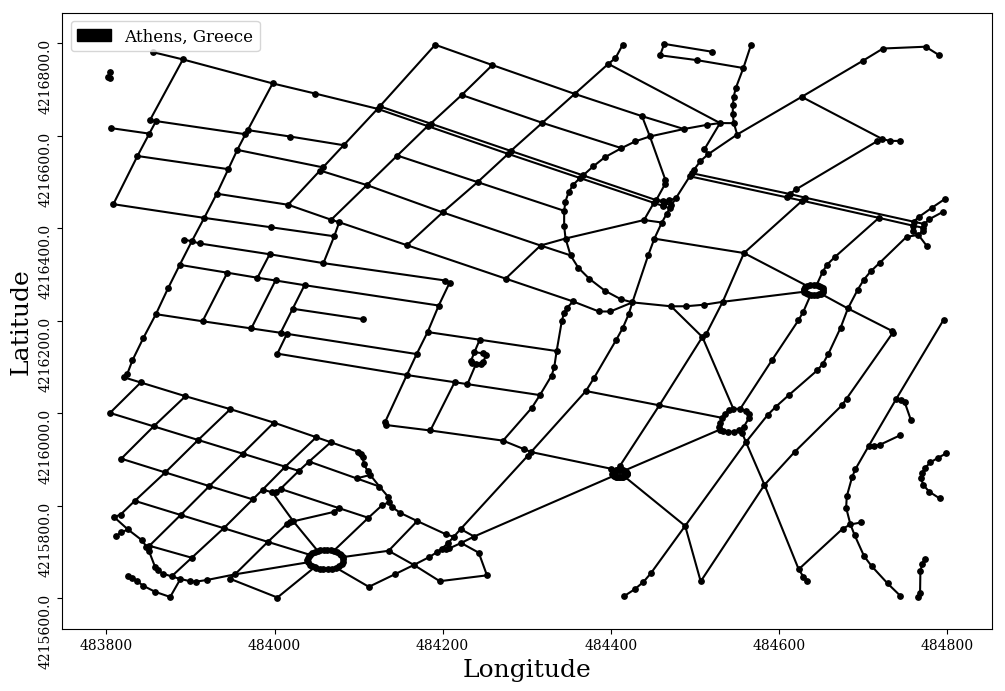

In [3]:
filepath = 'examples/athens/groundtruth'
graph = Graph(filename=filepath, name='Athens, Greece')

fig, ax = graph.Plot2MatPlotLib(plot=False, legend_fontsize=legend_fontsize) 
fig.set_size_inches(12, 8) 

#ax.set_title("Geometric Graph", fontsize=title_fontsize)
ax.set_xlabel("Longitude", fontsize=axis_fontsize_rect)
ax.set_ylabel("Latitude", fontsize=axis_fontsize_rect)
ax.set_yticklabels(ax.get_yticks(), rotation=90)

fig.savefig("svgs/geometric_graph.svg", format='svg')
plt.show()

### Plot Two Curves Example

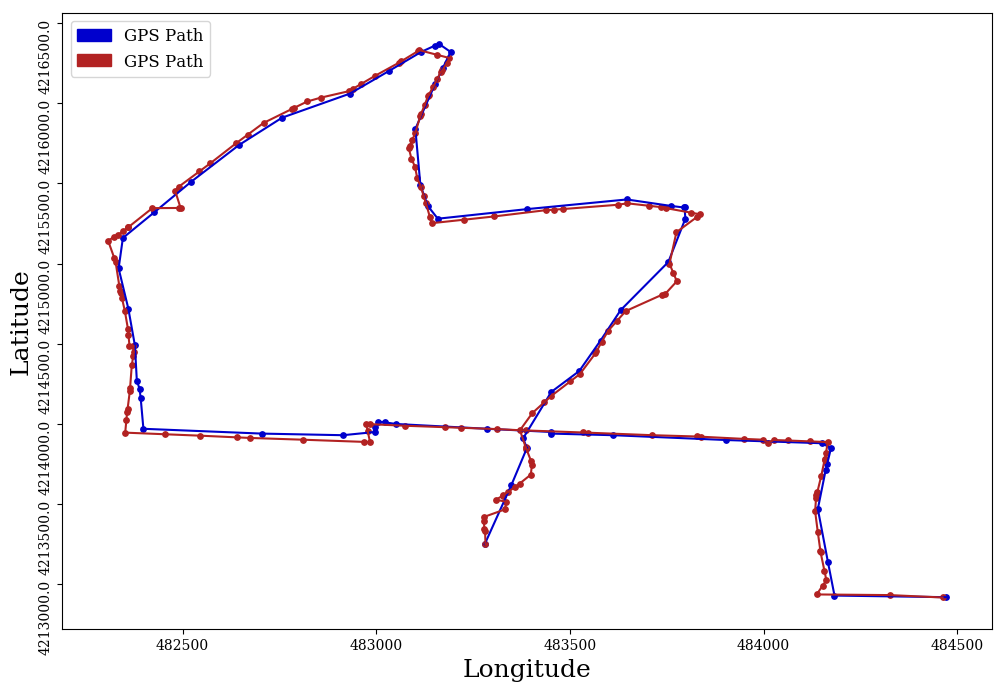

In [4]:
filepath_1 = 'examples/trajectories/1'
filepath_2 = 'examples/trajectories/2'

curve_1 = Graph(filename=filepath_1, name='GPS Path')
curve_2 = Graph(filename=filepath_2, name='GPS Path')

visualize = Visualize(curve_1, curve_2, epsilon=0.001)
fig, ax = visualize.plot_graphs(legend_fontsize=legend_fontsize)
fig.set_size_inches(12, 8) 

#ax.set_title("Pair of Discrete Curves", fontsize=title_fontsize)
ax.set_title("")

ax.set_xlabel("Longitude", fontsize=axis_fontsize_rect)
ax.set_ylabel("Latitude", fontsize=axis_fontsize_rect)

ax.set_yticklabels(ax.get_yticks(), rotation=90)

fig.savefig("svgs/discrete_curves_pair.svg", format='svg')
plt.show()

### Plot Two Geometric Graphs Example

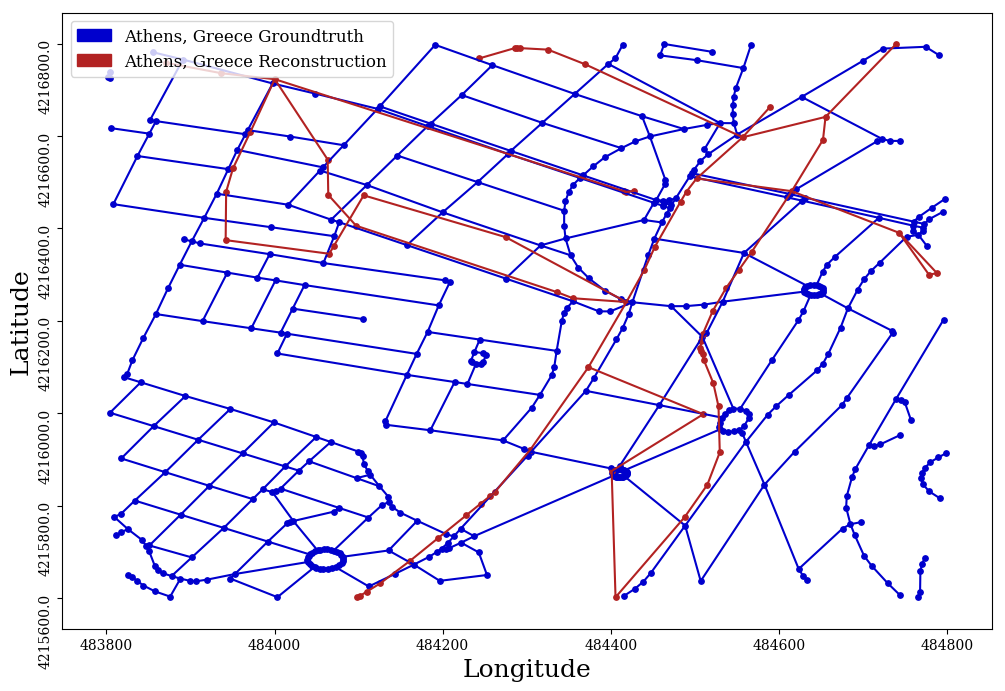

In [5]:
filepath_1 = 'examples/athens/groundtruth'
filepath_2 = 'examples/athens/kevin'

graph_1 = Graph(filename=filepath_1, name='Athens, Greece Groundtruth')
graph_2 = Graph(filename=filepath_2, name='Athens, Greece Reconstruction')

visualize = Visualize(graph_1, graph_2, epsilon=0.001)
fig, ax = visualize.plot_graphs(legend_fontsize=legend_fontsize)
fig.set_size_inches(12, 8) 

#ax.set_title("Pair of Geometric Graphs", fontsize=title_fontsize)
ax.set_title("")

ax.set_xlabel("Longitude", fontsize=axis_fontsize_rect)
ax.set_ylabel("Latitude", fontsize=axis_fontsize_rect)

ax.set_yticklabels(ax.get_yticks(), rotation=90)

fig.savefig("svgs/geometric_graph_pair.svg", format='svg')
plt.show()

### 2 Edge Example with corresponding Free Space Cell 

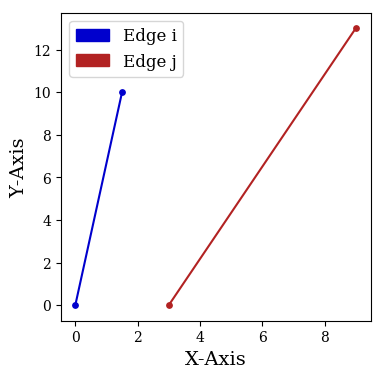

In [6]:
filepath_1 = 'examples/pair/aside'
filepath_2 = 'examples/pair/bside'

graph_1 = Graph(filename=filepath_1, name='Edge i')
graph_2 = Graph(filename=filepath_2, name='Edge j')

visualize = Visualize(graph_1, graph_2, epsilon=0.001)
fig, ax = visualize.plot_graphs(legend_fontsize=legend_fontsize)
fig.set_size_inches(4, 4) 

#ax.set_title("Pair of Distinct Edges", fontsize=title_fontsize)
ax.set_title("")

ax.set_xlabel("X-Axis", fontsize=axis_fontsize_small_square)
ax.set_ylabel("Y-Axis", fontsize=axis_fontsize_small_square)

fig.savefig("svgs/edge_pair.svg", format='svg')
plt.show()

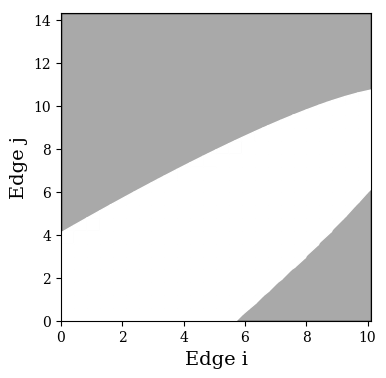

In [7]:
filepath_1 = 'examples/pair/aside'
filepath_2 = 'examples/pair/bside'

curve_1 = Curve(filepath_1)
curve_2 = Curve(filepath_2)

epsilon = 6

fsd = FreeSpaceDiagram(curve_1, curve_2, n_approximation=25)
fsd.buildFreeSpace(epsilon)

fsd.buildCells()
fig, ax = fsd.plotFreeSpace()
fig.set_size_inches(4, 4) 

#ax.set_title(f"Free Space Diagram | Epsilon = {epsilon}", fontsize=title_fontsize)
ax.set_xlabel("Edge i", fontsize=axis_fontsize_small_square)
ax.set_ylabel("Edge j", fontsize=axis_fontsize_small_square)

plt.savefig('svgs/edge_pair_fsd_epsilon_12.svg', format='svg')

### Plot Two Simple Curves Example

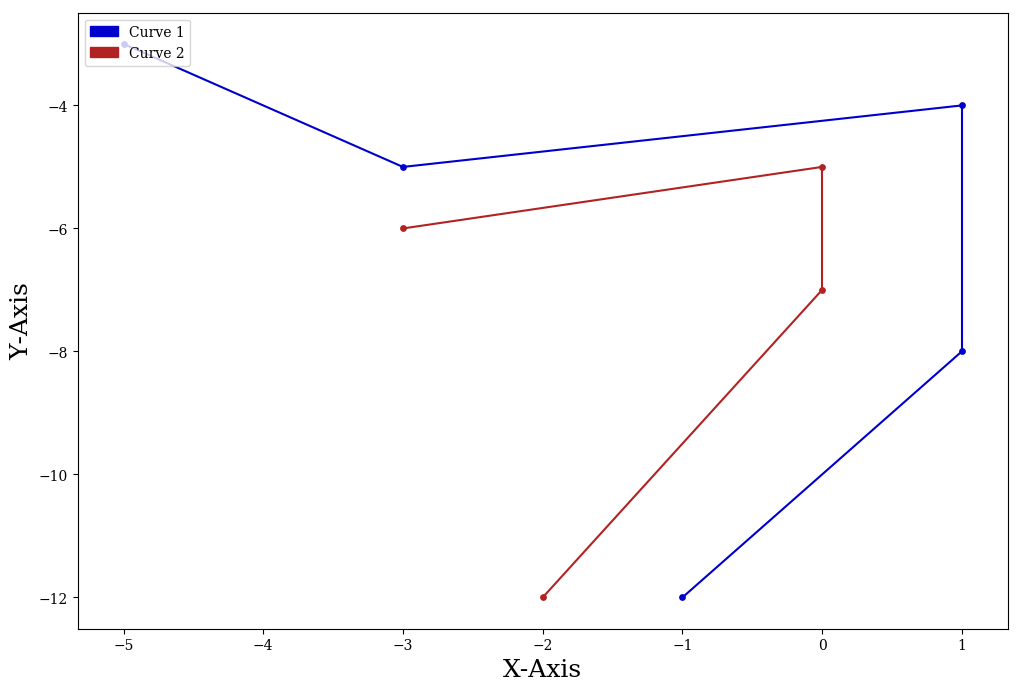

In [8]:
filepath_1 = 'examples/simple_curve/1'
filepath_2 = 'examples/simple_curve/2'

curve_1 = Graph(filename=filepath_1, name='Curve 1')
curve_2 = Graph(filename=filepath_2, name='Curve 2')

visualize = Visualize(curve_1, curve_2, epsilon=0.001)
fig, ax = visualize.plot_graphs()
fig.set_size_inches(12, 8) 

#ax.set_title("Pair of Discrete Curves", fontsize=title_fontsize)
ax.set_title("")

ax.set_xlabel("X-Axis", fontsize=axis_fontsize_rect)
ax.set_ylabel("Y-Axis", fontsize=axis_fontsize_rect)

fig.savefig("svgs/simple_discrete_curves_pair.svg", format='svg')
plt.show()

### Plot Two Simple Curves FSD EPS = 5, 2.5

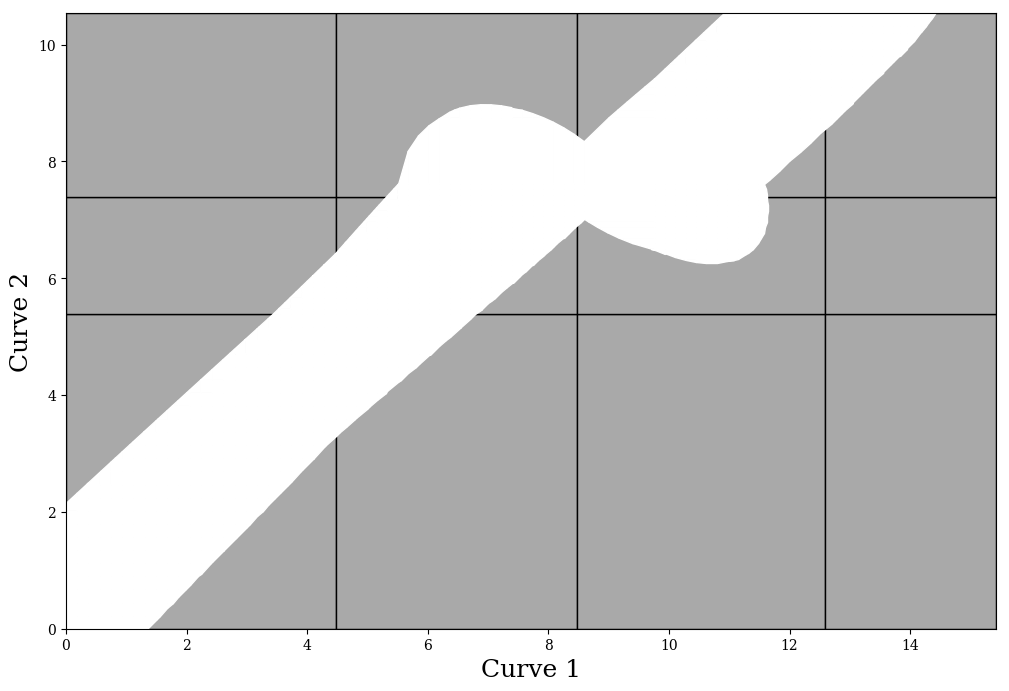

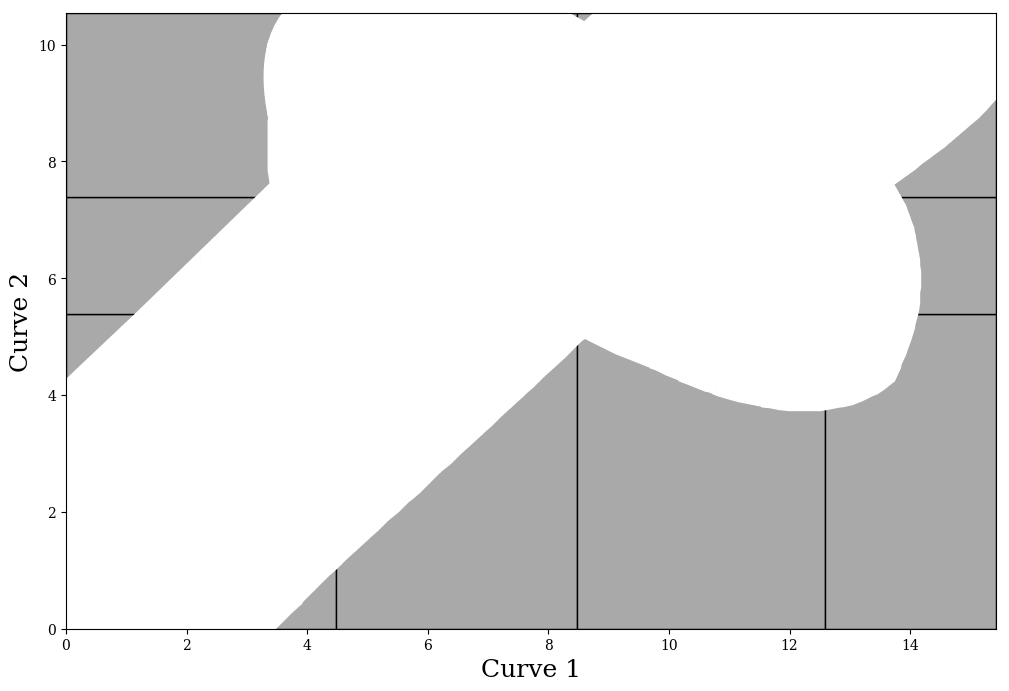

In [9]:
filepath_1 = 'examples/simple_curve/1'
filepath_2 = 'examples/simple_curve/2'

curve_1 = Curve(filepath_1)
curve_2 = Curve(filepath_2)

for idx, epsilon in enumerate([2, 4], 1):
    fsd = FreeSpaceDiagram(curve_1, curve_2, n_approximation=25)
    fsd.buildFreeSpace(epsilon)
    fsd.buildCells()
    
    fig, ax = fsd.plotFreeSpace()
    fig.set_size_inches(12, 8) 
    #ax.set_title(f"Free Space Diagram | Epsilon = {epsilon}", fontsize=title_fontsize)
    ax.set_xlabel("Curve 1", fontsize=axis_fontsize_rect)
    ax.set_ylabel("Curve 2", fontsize=axis_fontsize_rect)
    
    plt.savefig(f'svgs/simple_curve_fsd_epsilon_{idx}.svg', format='svg')

### Graph by curve visual


Duplicated Edge: 19


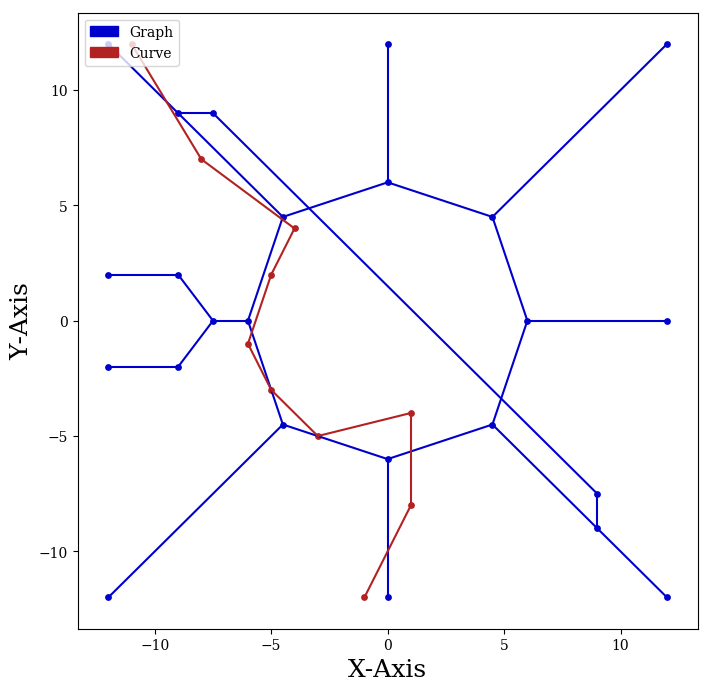

In [10]:
filepath_1 = 'examples/paris/arc_de_triomphe'
filepath_2 = 'examples/paris/vehicle'
graph_1 = Graph(filepath_1, name="Graph")
graph_2 = Graph(filepath_2, name="Curve")

visualize = Visualize(graph_1, graph_2, epsilon=0.001)
fig, ax = visualize.plot_graphs()
fig.set_size_inches(8, 8) 
ax.set_title("")

ax.set_xlabel("X-Axis", fontsize=axis_fontsize_rect)
ax.set_ylabel("Y-Axis", fontsize=axis_fontsize_rect)

fig.savefig("svgs/graph_curve.svg", format='svg')
plt.show()

Duplicated Edge: 19


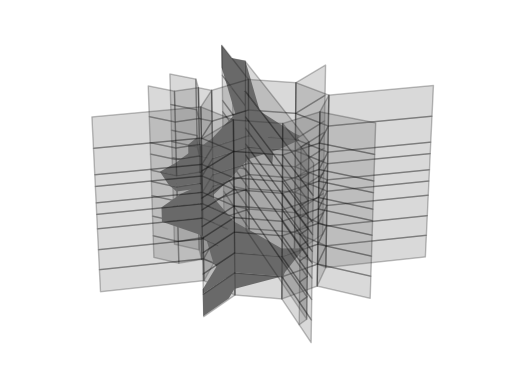

In [11]:
epsilon = 5
graph = Graph(filepath_1)
curve = Curve(filepath_2)

#ctg = GraphByCurve(graph, curve, n_approximation=25)
ctg = GraphByCurve(graph, curve)

ctg.buildCells()
ctg.buildFreeSpace(epsilon)
ctg.plotFreeSpace(f"svgs/graph_curve_FSD_{epsilon}.svg")

### Plot Two Edge Case for Abstract Visualization EPS = 20

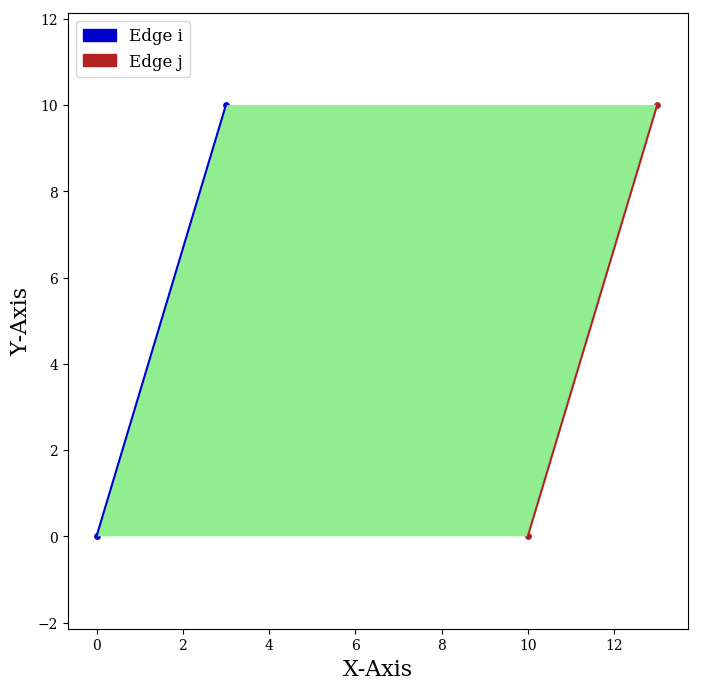

In [12]:
filepath_1 = 'examples/quad/aside'
filepath_2 = 'examples/quad/bside'

graph_1 = Graph(filename=filepath_1, name='Edge i')
graph_2 = Graph(filename=filepath_2, name='Edge j')

epsilon = 15

visualize = Visualize(graph_1, graph_2, epsilon=epsilon)
fig, ax = visualize.plot_freespace(legend_fontsize=legend_fontsize)
fig.set_size_inches(8, 8) 

#ax.set_title(f"Pair of Distinct Edges | Epsilon = {epsilon}", fontsize=title_fontsize)
ax.set_title("")

ax.set_xlabel("X-Axis", fontsize=axis_fontsize_square)
ax.set_ylabel("Y-Axis", fontsize=axis_fontsize_square)

fig.savefig(f"svgs/edge_pair_epsilon_{epsilon}.svg", format='svg')
plt.show()
    

### Plot Two Edge Case for Abstract Visualization EPS = 0, 5, 10, 20 

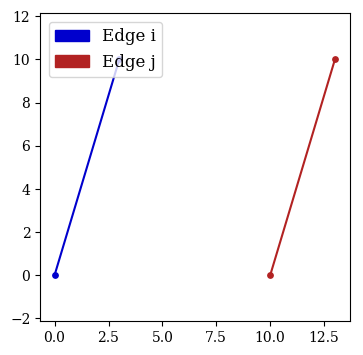

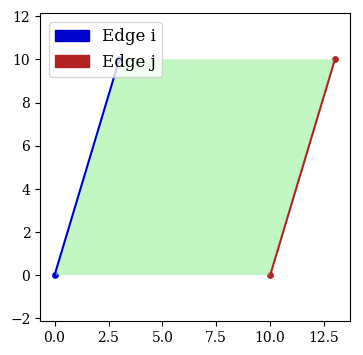

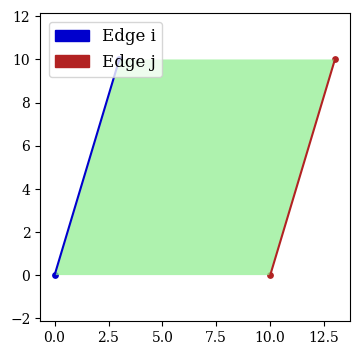

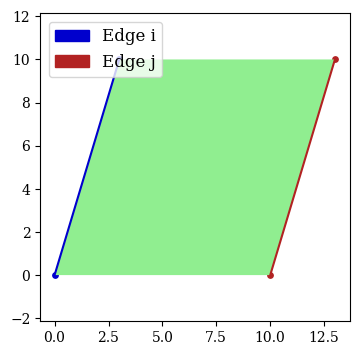

In [13]:
epsilons = (0, 10.01, 10.5, 15)

for idx, epsilon in enumerate(epsilons, 1):

    visualize = Visualize(graph_1, graph_2, epsilon=epsilon)
    fig, ax = visualize.plot_freespace(legend_fontsize=legend_fontsize)
    fig.set_size_inches(4, 4) 
    
    ax.set_title("")

    fig.savefig(f"svgs/edge_pair_epsilon_{idx}.svg", format='svg')
    plt.show()

### Complex Traversal Distance Visualization Graphs 

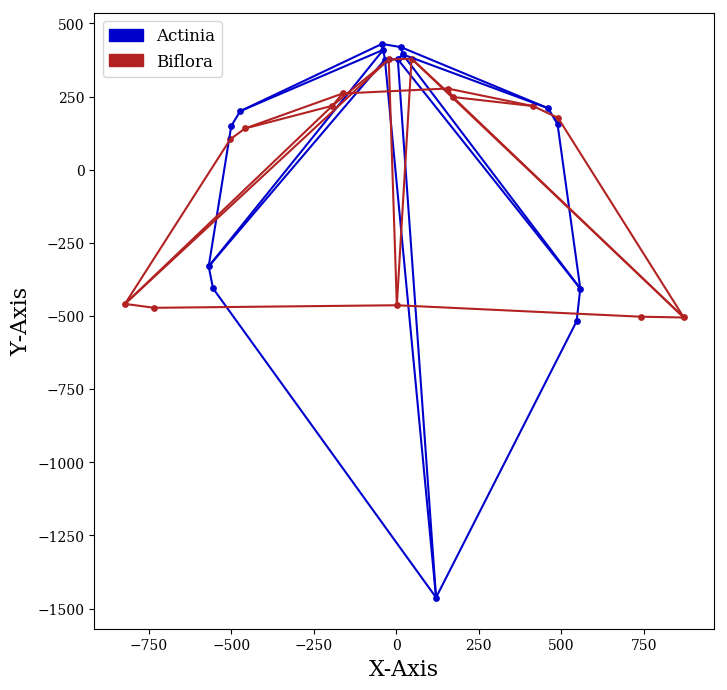

In [14]:
filepath_1 = 'examples/plant/Pact1_actinia_3'
filepath_2 = 'examples/plant/Pbif1_biflora_1'

graph_1 = Graph(filename=filepath_1, name='Actinia')
graph_2 = Graph(filename=filepath_2, name='Biflora')

visualize = Visualize(graph_1, graph_2, epsilon=0.001)
fig, ax = visualize.plot_graphs(legend_fontsize=legend_fontsize)
fig.set_size_inches(8, 8) 

#ax.set_title("Pair of Geometric Graphs", fontsize=title_fontsize)
ax.set_title("")

ax.set_xlabel("X-Axis", fontsize=axis_fontsize_square)
ax.set_ylabel("Y-Axis", fontsize=axis_fontsize_square)

fig.savefig("svgs/plant_geometric_graph_pair.svg", format='svg')
plt.show()

### Dif. Epsilons for Complex Traversal Distance Example. 

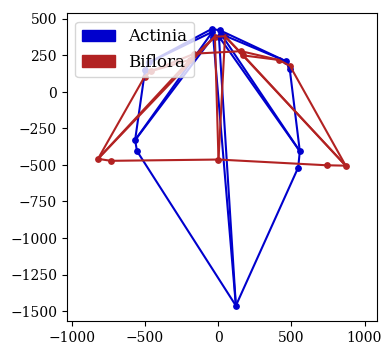

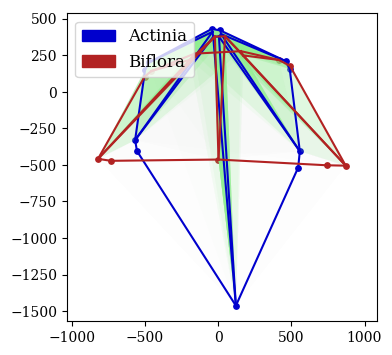

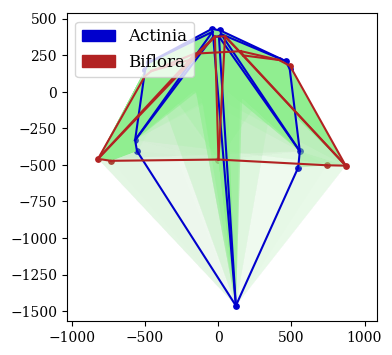

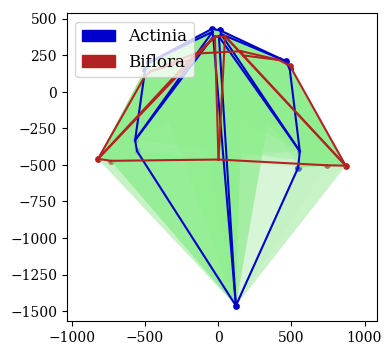

In [15]:
epsilons = (0, 150, 300, 450)

for idx, epsilon in enumerate(epsilons, 1):
    
    visualize = Visualize(graph_1, graph_2, epsilon=epsilon)
    fig, ax = visualize.plot_freespace(legend_fontsize=legend_fontsize)
    fig.set_size_inches(4, 4) 
    
    ax.set_title("")

    fig.savefig(f"svgs/plant_geometric_graph_pair_epsilon_{idx}.svg", format='svg')
    plt.show()